In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

# 기본정보 파악하기

In [130]:
young_df = pd.read_csv('data/young_survey.csv')
young_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [133]:
basic_info = young_df.iloc[:, 140:]
basic_info.head()
# 나이, 키, 몸무게, 형제자매수, 성별, 왼손잡이오른손잡이, 최종학력

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school


In [134]:
basic_info.describe() # 수치 통계

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [135]:
basic_info['Gender'].value_counts()
# 성별 통계

female    587
male      405
Name: Gender, dtype: int64

In [136]:
basic_info['Handedness'].value_counts()
# 왼손잡이 오른손잡이 통계

right    895
left      99
Name: Handedness, dtype: int64

In [137]:
basic_info['Education'].value_counts()
# 최종학력 통계
# 고등학교 졸업한 사람이 가장 많음 - 대학생 대상 설문조사

high school          618
bachelor's degree    207
middle school         78
master's degree       78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

<AxesSubplot:ylabel='Age'>

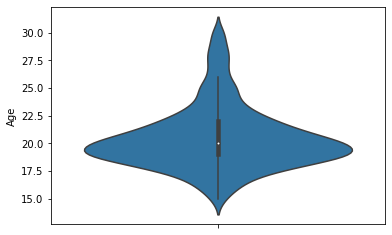

In [141]:
sns.violinplot(data=basic_info, y='Age')

# 10후반과 20대 초반의 사람이 많다

<AxesSubplot:xlabel='Gender', ylabel='Age'>

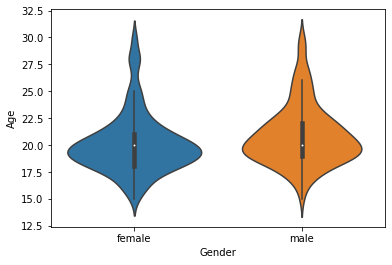

In [142]:
sns.violinplot(data=basic_info, x='Gender', y='Age')

# 남녀 나이 분포가 비슷하다

<AxesSubplot:xlabel='Gender', ylabel='Age'>

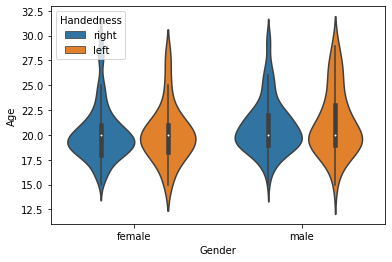

In [143]:
sns.violinplot(data=basic_info, x='Gender', y='Age', hue='Handedness')

# 여성 왼손잡이, 오른손잡이 / 남성 왼손잡이, 오른손잡이 모두 비슷한 나이 분포를 가지고 있다.

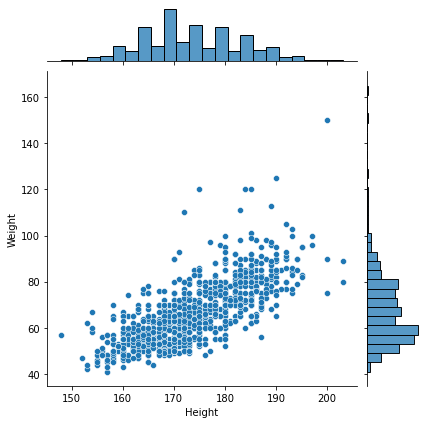

In [144]:
sns.jointplot(data=basic_info, x='Height', y='Weight')

# jointplot은 키와 몸무게의 연관성, 키의 분포/몸무게의 분포도 볼 수 있다.

---

# 요즘 인기 직업은?

In [2]:
df = pd.read_csv('data/occupations.csv')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# 여성분들이 가장 많이 종사하고 있는 직종은?

In [19]:
women = df[df['gender'] == 'F']
women

,user_id,age,gender,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405
14,15,49,F,educator,97301
...,...,...,...,...,...
924,925,18,F,salesman,49036
929,930,28,F,scientist,07310
937,938,38,F,technician,55038
938,939,26,F,student,33319


In [20]:
women['occupation'].value_counts().sort_values(ascending=False)

student          60
other            36
administrator    36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
programmer        6
homemaker         6
none              4
executive         3
scientist         3
salesman          3
engineer          2
lawyer            2
entertainment     2
retired           1
technician        1
Name: occupation, dtype: int64

### => student, administrator, other, librarian 순으로 많다

# 남성분들이 가장 많이 종사하고 있는 직종은?

In [23]:
men = df[df['gender'] == 'M']
men

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
...,...,...,...,...,...
935,936,24,M,other,32789
936,937,48,M,educator,98072
939,940,32,M,administrator,02215
940,941,20,M,student,97229


In [24]:
men['occupation'].value_counts().sort_values(ascending=False)

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
entertainment     16
marketing         16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
none               5
healthcare         5
homemaker          1
Name: occupation, dtype: int64

### => student, educator, other, engineer 순으로 많다

---

# 상관관계분석

In [45]:
young_df = pd.read_csv('data/young_survey.csv')
young_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [27]:
music = young_df.iloc[:, :19]
music.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


<AxesSubplot:>

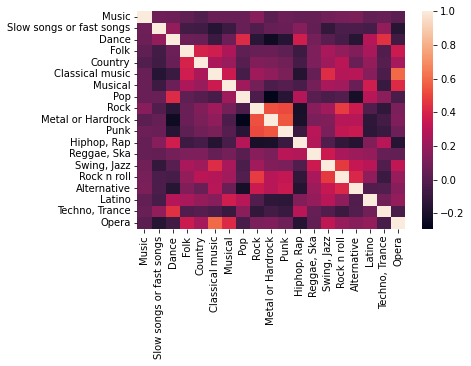

In [28]:
sns.heatmap(music.corr())

In [30]:
young_df.corr()['Age'].sort_values(ascending=False)

Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

# 브런치 카페 음악 셀렉션

- 대학생들을 대상으로 브런치 카페 운영 중
- 손님들의 취향에 딱 맞는 음악을 틀고싶음
- 브런치 카페이기 때문에, 일찍 일어나는 사람들이 좋아할 만한 음악이 뭐가 좋을까
- column 'Getting up' 아침에 일어나는 걸 얼마나 어려워하는가를 나타낸 정보이다.

In [36]:
brunch = young_df[young_df['Getting up'] == 1.0]
brunch

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
14,5.0,3.0,2.0,1.0,1.0,2.0,3.0,4.0,5.0,2.0,...,5.0,1,4.0,22.0,175.0,57.0,1.0,female,right,bachelor's degree
27,4.0,5.0,3.0,4.0,1.0,3.0,2.0,2.0,4.0,2.0,...,3.0,2,3.0,19.0,163.0,50.0,1.0,female,right,high school
33,5.0,4.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0,1.0,...,1.0,2,4.0,27.0,170.0,70.0,1.0,female,right,master's degree
44,4.0,4.0,4.0,2.0,1.0,3.0,3.0,4.0,4.0,1.0,...,5.0,3,4.0,25.0,170.0,67.0,1.0,female,right,master's degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,5.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,...,5.0,1,5.0,19.0,170.0,55.0,1.0,female,left,bachelor's degree
960,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,2.0,4,4.0,20.0,175.0,120.0,2.0,female,right,high school
977,5.0,4.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0,4.0,...,3.0,4,1.0,29.0,180.0,93.0,1.0,male,right,high school
989,5.0,5.0,3.0,1.0,3.0,1.0,1.0,2.0,5.0,5.0,...,1.0,3,3.0,22.0,181.0,72.0,1.0,male,right,high school


In [39]:
brunch.corr()['Music'].sort_values(ascending=False)

Music                    1.000000
Personality              0.252744
Dreams                   0.223858
Opera                    0.198766
Adrenaline sports        0.174379
                           ...   
Finances                -0.199686
Charity                 -0.212517
Prioritising workload   -0.277859
Heights                 -0.316692
Getting up                    NaN
Name: Music, Length: 139, dtype: float64

In [43]:
# 해설
brunch_df = young_df.corr()['Getting up']
brunch_df
brunch_df[1:19]
brunch_df[1:19].sort_values(ascending=True)

Opera                      -0.071819
Slow songs or fast songs   -0.052613
Folk                       -0.049612
Punk                       -0.029189
Metal or Hardrock          -0.026769
Country                    -0.025315
Latino                     -0.015060
Reggae, Ska                -0.008434
Musical                     0.011869
Classical music             0.014285
Swing, Jazz                 0.019556
Techno, Trance              0.019863
Dance                       0.027249
Alternative                 0.027540
Rock n roll                 0.028889
Hiphop, Rap                 0.038980
Pop                         0.079101
Rock                        0.105245
Name: Getting up, dtype: float64

### 결론, 일찍 일어나는 학생들은 Opera 음악을 좋아하는 경향이 있다

---

# 스타트업 아이템 탐색

경영학과 3학년이 된 영준이는 스타트업을 준비하고 있습니다.
사업 아이템을 고민하면서, 나름대로 가설을 몇 개 세워봤습니다.

- 악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.
- 외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.
- 메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.
- 워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.

이 가설과 관련이 있는 column은 다음과 같습니다.

- Branded clothing: 나는 브랜드가 없는 옷보다 브랜드가 있는 옷을 선호한다.
- Healthy eating: 나는 건강하거나 품질이 좋은 음식에는 기쁘게 돈을 더 낼 수 있다.
- Musical instruments: 나는 악기 연주에 관심이 많다.
- New environment: 나는 새 환경에 잘 적응하는 편이다.
- Prioritising workload: 나는 일을 미루지 않고 즉시 해결해버리려고 한다.
- Spending on looks: 나는 내 외모에 돈을 많이 쓴다.
- Workaholism: 나는 여가 시간에 공부나 일을 자주 한다.
- Writing: 나는 시 쓰기에 관심이 많다.
- Writing notes: 나는 항상 메모를 한다.

### 가설1. 악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.

- Musical instruments
- Writing

In [49]:
musical = young_df.corr()['Musical instruments']
musical['Writing']
# 0.3438162143904336

0.3438162143904336

In [55]:
young_df.corr().loc['Musical instruments', 'Writing']

0.3438162143904336

### 가설2. 외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.

- Spending on looks
- Branded clothing

In [50]:
looks = young_df.corr()['Spending on looks']
looks['Branded clothing']
# 0.4183989446458902

0.4183989446458902

In [56]:
young_df.corr().loc['Spending on looks', 'Branded clothing']

0.4183989446458902

### 가설3. 메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.

- Writing notes
- New environment

In [51]:
memo = young_df.corr()['Writing notes']
memo['New environment']
# -0.07939652994810617

-0.07939652994810617

In [57]:
young_df.corr().loc['Writing notes', 'New environment']

-0.07939652994810617

### 가설4. 워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.

- Prioritising workload
- Workaholism
- Healthy eating

In [52]:
works = young_df.corr()['Prioritising workload']
works['Healthy eating']
# 0.2421311819863002

0.2421311819863002

In [59]:
young_df.corr().loc['Prioritising workload','Healthy eating']

0.2421311819863002

In [53]:
works = young_df.corr()['Workaholism']
works['Healthy eating']
# 0.23864443283866715

0.23864443283866715

In [60]:
young_df.corr().loc['Workaholism', 'Healthy eating']

0.23864443283866715

### 결론, 가설 3번이 가장 상관관계가 낮다

---

# 클러스터 분석(Cluster Analysis)

데이터를 몇 가지 부류로 나눠서 분석

In [61]:
young_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [63]:
# 관심사 추출
interests = young_df.loc[:, 'History':'Pets']
interests

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
993,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,1.0,...,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
994,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
995,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


In [65]:
# 상관관계
corr = interests.corr()
corr

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
History,1.000000,0.281493,0.400845,0.008328,0.079638,0.022010,0.027346,0.054872,0.014807,0.014117,...,-0.013262,0.064929,0.033196,-0.087338,-0.061804,0.135597,0.185301,0.024960,0.061201,0.031920
Psychology,0.281493,1.000000,0.195338,0.043030,0.065774,0.000075,-0.077712,0.087072,0.202913,0.058541,...,-0.083949,0.006261,0.042099,-0.012857,0.058210,0.060809,0.268484,0.020027,0.058522,0.053322
Politics,0.400845,0.195338,1.000000,0.104033,0.130293,0.058863,0.088846,0.304575,-0.090532,-0.058849,...,0.042173,0.069026,-0.018266,-0.023371,-0.064327,0.186743,0.085306,0.009968,0.090355,-0.055446
Mathematics,0.008328,0.043030,0.104033,1.000000,0.595188,0.157779,0.295564,0.218796,0.078043,0.181953,...,0.055701,0.083826,0.031867,-0.111193,-0.156334,0.249863,-0.018890,-0.030492,0.098004,-0.031633
Physics,0.079638,0.065774,0.130293,0.595188,1.000000,0.103793,0.339429,0.010678,0.212261,0.322827,...,0.016199,0.118929,0.047723,-0.211790,-0.227379,0.430393,0.001382,-0.029794,0.146055,-0.022982
Internet,0.022010,0.000075,0.058863,0.157779,0.103793,1.000000,0.467867,0.164447,-0.101429,-0.107657,...,0.171394,0.009498,-0.049947,0.114478,0.086552,0.190400,-0.149085,0.108927,0.072552,0.006894
PC,0.027346,-0.077712,0.088846,0.295564,0.339429,0.467867,1.000000,0.155285,-0.083648,-0.042937,...,0.080169,0.127505,-0.005789,-0.050504,-0.162955,0.420528,-0.177682,0.004907,0.154008,-0.066745
Economy Management,0.054872,0.087072,0.304575,0.218796,0.010678,0.164447,0.155285,1.000000,-0.173794,-0.180850,...,0.049986,0.071795,-0.045067,0.090132,0.111786,0.060767,-0.009515,0.066244,0.126719,-0.061738
Biology,0.014807,0.202913,-0.090532,0.078043,0.212261,-0.101429,-0.083648,-0.173794,1.000000,0.689980,...,-0.011216,0.055579,0.268927,0.012611,0.090339,0.151654,0.168296,0.013397,0.039657,0.169852
Chemistry,0.014117,0.058541,-0.058849,0.181953,0.322827,-0.107657,-0.042937,-0.180850,0.689980,1.000000,...,-0.041194,0.042481,0.200144,-0.083627,0.002447,0.195571,0.098171,-0.024690,0.035784,0.106649


In [68]:
# 역사에 관심있는 사람들의 상관관계
corr['History'].sort_values(ascending=False)

History                   1.000000
Politics                  0.400845
Geography                 0.327354
Law                       0.298363
Psychology                0.281493
Reading                   0.262948
Religion                  0.203840
Art exhibitions           0.200643
Theatre                   0.185301
Writing                   0.164617
Foreign languages         0.145471
Science and technology    0.135597
Musical instruments       0.107279
Countryside, outdoors     0.096609
Physics                   0.079638
Active sport              0.064929
Adrenaline sports         0.061201
Economy Management        0.054872
Cars                      0.050644
Medicine                  0.040023
Gardening                 0.033196
Dancing                   0.032925
Pets                      0.031920
PC                        0.027346
Fun with friends          0.024960
Internet                  0.022010
Biology                   0.014807
Chemistry                 0.014117
Mathematics         

- 높 : 정치, 지리, 법, 심리, 독서
- 낮 : 연예계, 쇼핑, 스포츠, 옷, 수학, 과학

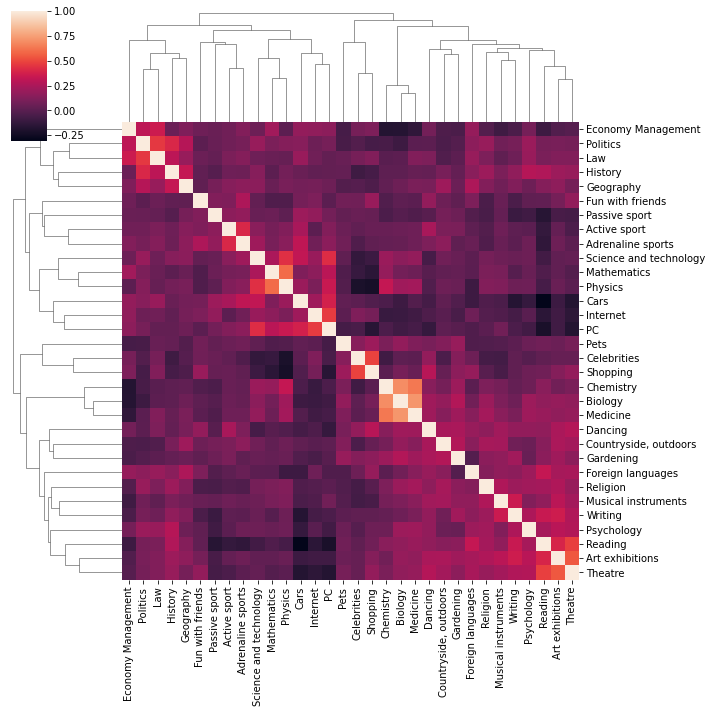

In [69]:
# seavorn 라이브러리 cluster map 

sns.clustermap(corr)

# 영화 카페 운영하기

음악 선곡을 잘해서 대위의 브런치 카페는 대박이 났습니다. 그런데 브런치 카페이다 보니 저녁 시간대에는 가게가 텅텅 빌 수밖에 없죠.

고민 끝에, 저녁에는 가게를 영화 카페로 변신시켜 볼까 하는데요. 우선 수 많은 영화 DVD를 어떻게 배치해야 할지 고민입니다. 좀 연관된 장르끼리 묶어서 보관해야, 각 손님들의 취향을 잘 맞출 수 있을 것 같습니다.

이번에도 대박을 위해서 데이터의 도움을 최대한 빌리려고 합니다.

주어진 데이터셋에서 영화 장르에 대한 column은 'Horror'부터 'Action'까지 입니다. 영화 장르에 대해서 clustermap을 그려 보세요.

In [70]:
movies = young_df.loc[:, 'Horror':'Action']
movies

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
992,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0
993,2.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0
994,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0
995,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0


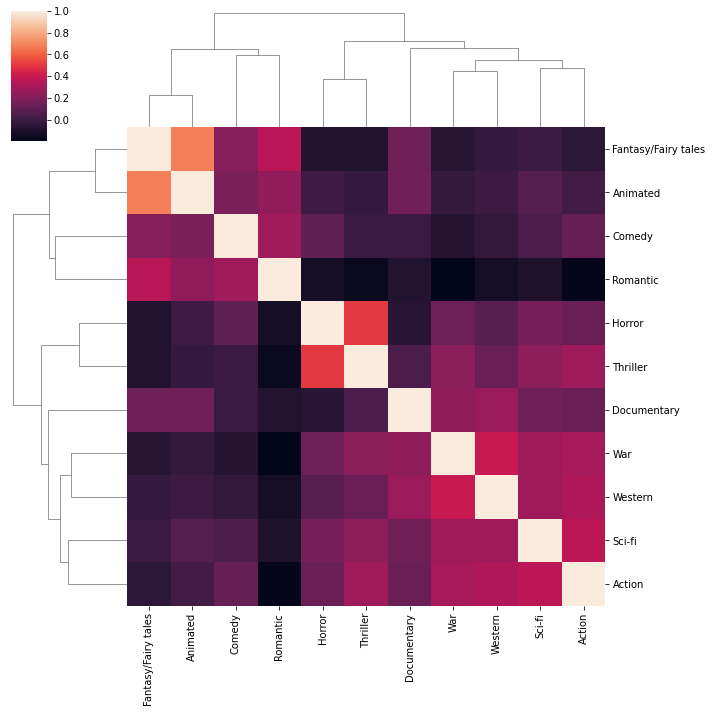

In [71]:
sns.clustermap(movies.corr())

그래프를 이용해서 보기를 하나씩 살펴봅시다.

1번: Romantic과 Comedy는 하나로 묶여 있습니다.

2번: Fantasy/Fairy tales와 Animated도 하나로 묶여 있습니다.

3번: War와 Western은 하나로 묶여 있지만, Animated는 따로 떨어져 있습니다.

4번: Documentary와 Romantic은 떨어져 있습니다. 둘 사이의  상관 관계가 비교적 낮다는 의미입니다.

5번: War과 Western은 하나로 묶여 있으며, Sci-fi와 Action도 하나로 묶여 있습니다. 그리고 이 두 그룹은 다시 더 큰 하나의 그룹으로 묶여 있습니다. 따라서 서로 연관 있는 장르라고 볼 수 있습니다.

---
# 타이타닉 EDA

- 생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
- 좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
- 지불한 요금은 'Fare' column에 저장되어 있습니다.

In [122]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:ylabel='Frequency'>

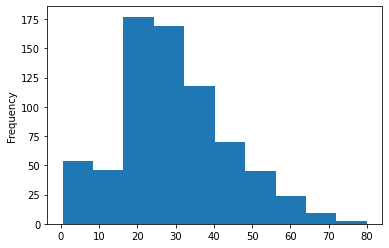

In [76]:
# 승객 연령대 분포도 확인

titanic_df['Age'].plot(kind='hist') 

### => 타이타닉 승객은 20대와 30대가 가장 많다

- 

In [81]:
# 가장 높은 요금을 낸 사람의 연령대는?

titanic_df.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Fare'>

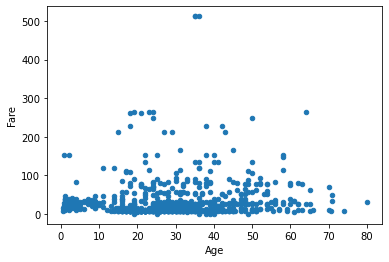

In [124]:
titanic_df.plot(kind='scatter', x='Age', y='Fare')

### => 가장 높은 요금을 낸 사람은 30대이다.

- 

In [82]:
# 생존자와 사망자의 수 비교

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### => 생존자보다 사망자가 더 많다

- 

In [83]:
# 좌석등급별 승객수 비교

titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### => 3등실 승객이 가장 많다

- 

<AxesSubplot:ylabel='Pclass'>

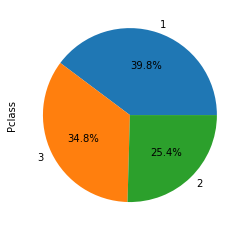

In [111]:
# 등급별 생존률

surv_pclass = titanic_df.loc[titanic_df['Survived'] == 1, 'Pclass']
surv_pclass.value_counts().plot(kind='pie', autopct='%.1f%%')

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

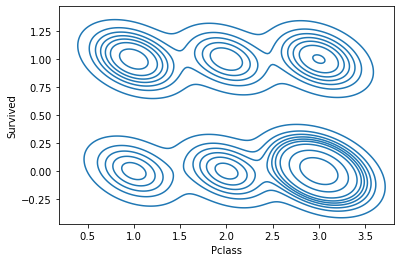

In [125]:
sns.kdeplot(titanic_df['Pclass'], titanic_df['Survived'])

# 그래프를 보면 3등실은 사망에 밀집되어 있고
# 2등실은 생존과 사망의 분포가 비슷하고
# 1등실은 생존에 더 밀집되어 있음을 알 수 있다.

### => 따라서, 1등실의 생존률이 더 높다

-

<AxesSubplot:xlabel='Survived', ylabel='Age'>

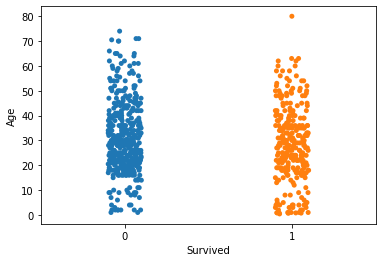

In [126]:
# 나이별 생존률

sns.stripplot(data=titanic_df, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

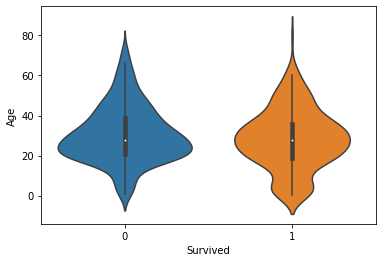

In [127]:
sns.violinplot(data=titanic_df, x='Survived', y='Age')

### => 생존자의 나이분포와 사망자의 나이 분포 사이에 큰 차이가 없다. 
따라서 나이가 어릴수록 생존률이 높다고 볼 수 없다

<AxesSubplot:xlabel='Survived', ylabel='Age'>

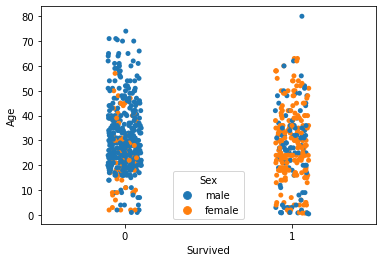

In [128]:
# 성별별 생존률

sns.stripplot(data=titanic_df, x='Survived', y='Age', hue='Sex')

### => 나이분포는 비슷하지만 성별 분포는 확연하게 차이가 나므로
나이보다는 성별에 영향을 많이 받았다는 것을 알 수 있다.